In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import ipywidgets as widgets
from ipywidgets import interactive
from IPython.display import display
import geopandas as gpd
import numpy as np
import pandas as pd
import xarray as xr
import numpy as np
from matplotlib.colors import ListedColormap

In [2]:
# Read the shapefile and transform to EPSG:4326
shape_path_filename = r"..\..\Dataset\HRs\i03_Hydrologic_Regions.shp"
hrs = gpd.read_file(shape_path_filename).to_crs("EPSG:4326")

In [3]:
filepath = r'../../Outputs/pr__cum_loss.nc'
ds_new = xr.open_dataset(filepath)
print(list(ds_new.variables.keys()))

['lat', 'lon', '2020_20', 'mean_20', 'cum_loss_20', '2020_20_21', '2021', 'sum', 'mean_20_21', '2x mean', 'cum_loss_20_21', '2020_20_21_22', '2021_20_21_22', '2022_20_21_22', 'sum_20_21_22', 'mean_20_21_22', '3x mean_20_21_22', 'cum_loss_20_21_22', 'crs']


In [4]:
# Extract longitude, latitude, and data values
lon = ds_new.lon.values
lat = ds_new.lat.values

variable_to_plot = ds_new.cum_loss_20_21_22.values
# Create a meshgrid for lon and lat
lon_grid, lat_grid = np.meshgrid(lon, lat)

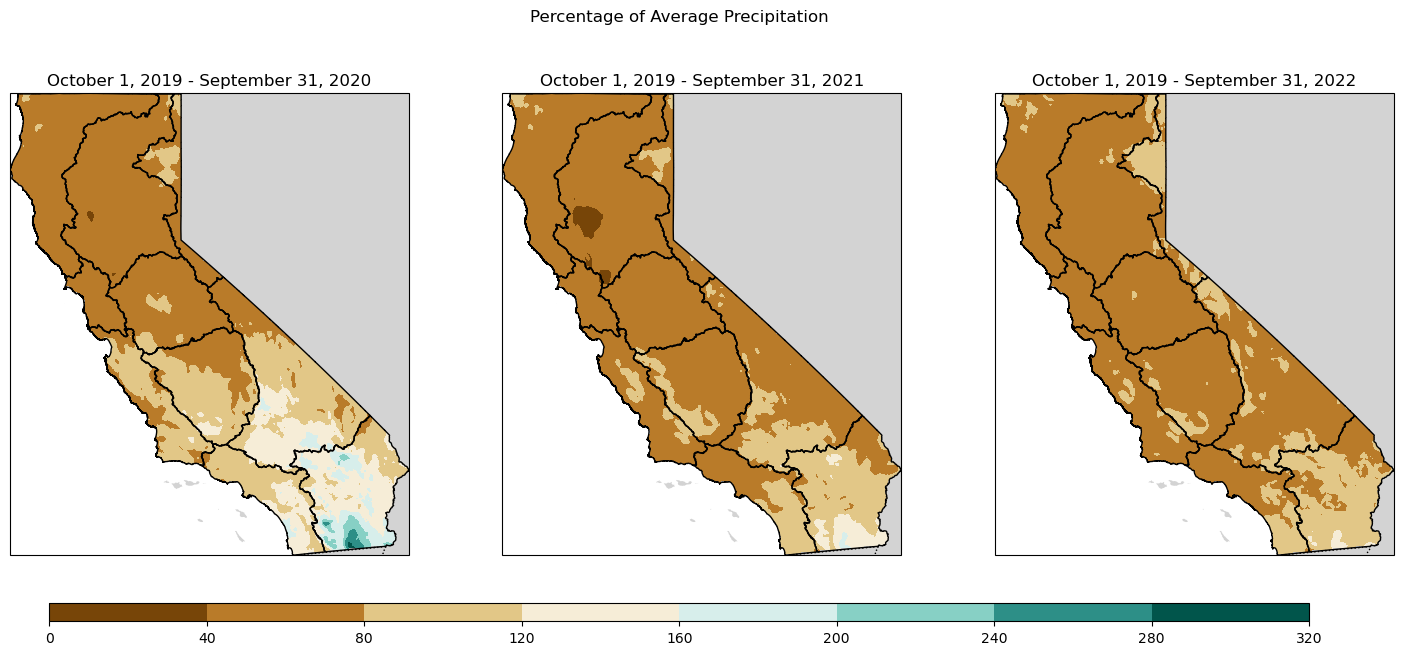

In [5]:
# Variables to plot
variables_to_plot = [
    ds_new.cum_loss_20.values,
    ds_new.cum_loss_20_21.values,
    ds_new.cum_loss_20_21_22.values
]

# Titles for subplots
titles = ['October 1, 2019 - September 31, 2020', 'October 1, 2019 - September 31, 2021', 'October 1, 2019 - September 31, 2022']

# Create subplots
fig, axes = plt.subplots(1, 3, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(18, 6))

# Create a colormap with distinct colors for each interval
cmap_discrete = ListedColormap(plt.get_cmap('BrBG')(np.linspace(0, 1, 17))[1::2])


# Iterate through variables and titles
for ax, variable, title in zip(axes, variables_to_plot, titles):
    # Set extent based on transformed geometries
    ax.set_extent([hrs.bounds['minx'].min(), hrs.bounds['maxx'].max(), hrs.bounds['miny'].min(), hrs.bounds['maxy'].max()])

    # Plot the contour with specified colormap
    img = ax.contourf(lon, lat, variable, transform=ccrs.PlateCarree(), cmap=cmap_discrete, levels=np.arange(0, 341, 40))

    # Add shapefile geometries
    hrs.plot(ax=ax, facecolor='none', edgecolor='black')

    # Add Natural Earth features for a basemap of the US
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, facecolor='lightgray')

    ax.set_title(title)


cbar_ax = fig.add_axes([0.15, 0.0, 0.7, 0.03])  # Adjust the position and size as needed
cbar = plt.colorbar(img, ax=ax, orientation='horizontal', shrink=0.8, ticks=np.arange(0, 341, 40), cax=cbar_ax)

# Overall title for the entire figure
fig.suptitle('Percentage of Average Precipitation', y=1.02)

# Show the plot
plt.show()

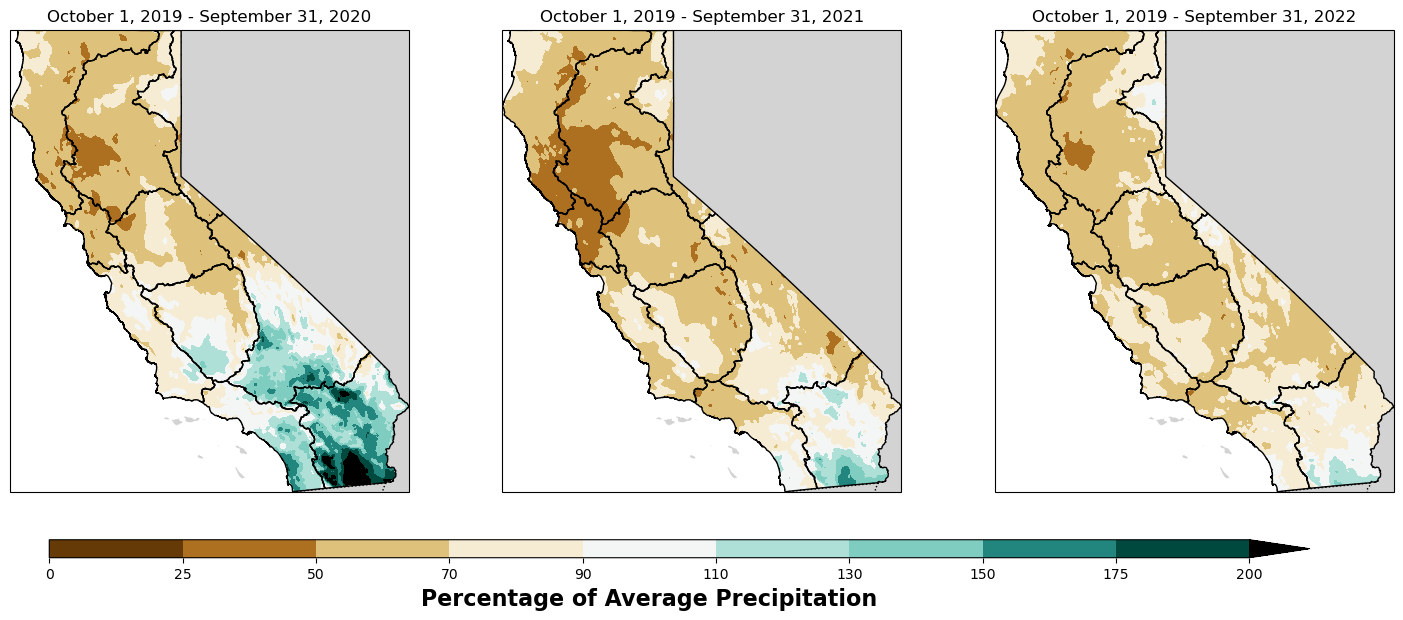

<Figure size 640x480 with 0 Axes>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import ListedColormap

# Variables to plot
variables_to_plot = [
    ds_new.cum_loss_20.values,
    ds_new.cum_loss_20_21.values,
    ds_new.cum_loss_20_21_22.values
]

# Titles for subplots
titles = ['October 1, 2019 - September 31, 2020', 'October 1, 2019 - September 31, 2021', 'October 1, 2019 - September 31, 2022']

# Create subplots
fig, axes = plt.subplots(1, 3, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(18, 6))

# Create a colormap with distinct colors for each interval
cmap_discrete = ListedColormap(plt.get_cmap('BrBG')(np.linspace(0, 1, 31))[1::2])

# Iterate through variables and titles
for ax, variable, title in zip(axes, variables_to_plot, titles):
    ax.set_extent([hrs.bounds['minx'].min(), hrs.bounds['maxx'].max(), hrs.bounds['miny'].min(), hrs.bounds['maxy'].max()])
    img = ax.contourf(lon, lat, variable, transform=ccrs.PlateCarree(), cmap=cmap_discrete, levels=[0,25,50,70,90,110,130,150,175,200], vmax=200, extend='max')
    img.cmap.set_over('black')

    hrs.plot(ax=ax, facecolor='none', edgecolor='black')
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    ax.set_title(title)


cbar_ax = fig.add_axes([0.15, 0.0, 0.7, 0.03])  # Adjust the position and size as needed
cbar = plt.colorbar(img, ax=ax, orientation='horizontal', shrink=0.8, ticks=[0,25,50,70,90,110,130,150,175,200], cax=cbar_ax)
cbar.set_label('Percentage of Average Precipitation', fontsize=16, weight='bold')

# fig.suptitle('Percentage of Average Precipitation', y=1.02)
plt.show()
plt.tight_layout()

This is trial

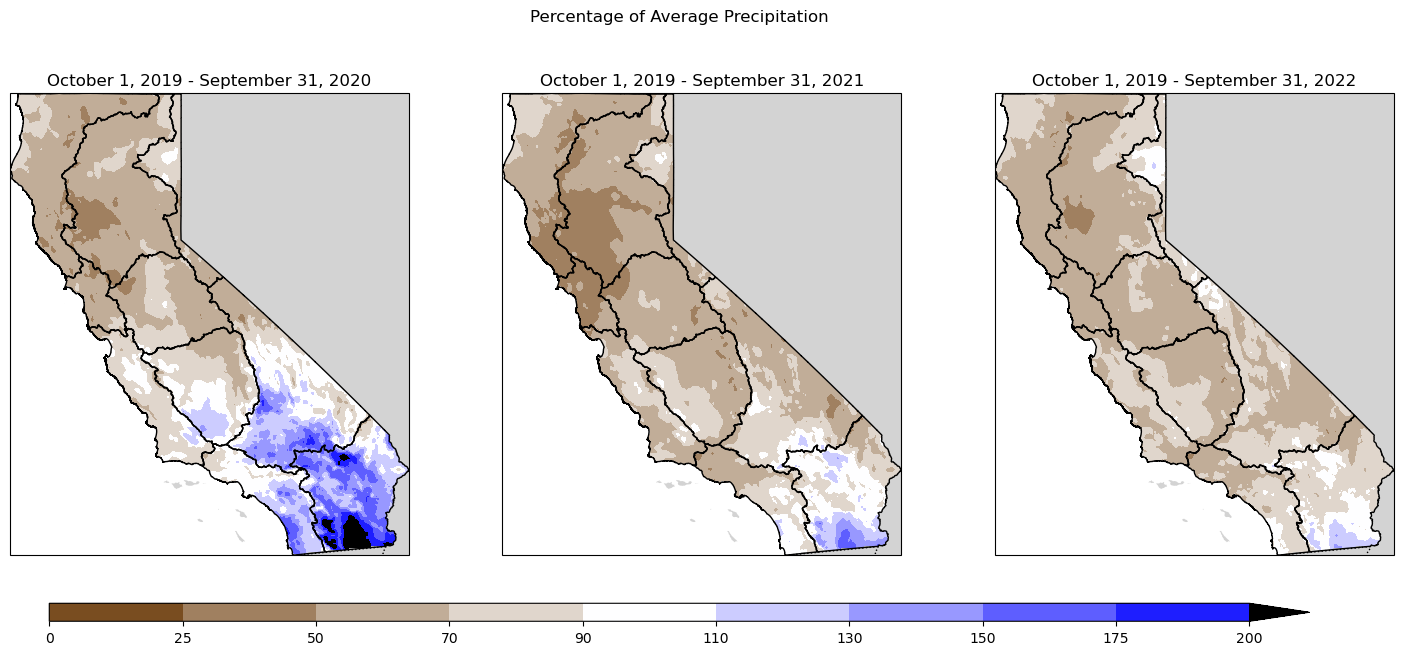

In [7]:
from matplotlib.colors import LinearSegmentedColormap

# Variables to plot
variables_to_plot = [
    ds_new.cum_loss_20.values,
    ds_new.cum_loss_20_21.values,
    ds_new.cum_loss_20_21_22.values
]

# Titles for subplots
titles = ['October 1, 2019 - September 31, 2020', 'October 1, 2019 - September 31, 2021', 'October 1, 2019 - September 31, 2022']

# Create subplots
fig, axes = plt.subplots(1, 3, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(18, 6))

def custom_cmap():
    brown = (0.4, 0.2, 0)
    white = (1, 1, 1)
    blue = (0, 0, 1)
    colors = [brown, white, blue]
    cmap_name = 'smooth_maroon_to_blue'
    return LinearSegmentedColormap.from_list(cmap_name, colors)

# Iterate through variables and titles
for ax, variable, title in zip(axes, variables_to_plot, titles):
    ax.set_extent([hrs.bounds['minx'].min(), hrs.bounds['maxx'].max(), hrs.bounds['miny'].min(), hrs.bounds['maxy'].max()])
    img = ax.contourf(lon, lat, variable, transform=ccrs.PlateCarree(), cmap=custom_cmap(), levels=[0,25,50,70,90,110,130,150,175,200], vmax=200, extend='max')
    img.cmap.set_over('black')

    hrs.plot(ax=ax, facecolor='none', edgecolor='black')
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    ax.set_title(title)


cbar_ax = fig.add_axes([0.15, 0.0, 0.7, 0.03])  # Adjust the position and size as needed
cbar = plt.colorbar(img, ax=ax, orientation='horizontal', shrink=0.8, ticks=[0,25,50,70,90,110,130,150,175,200], cax=cbar_ax)

# Overall title for the entire figure
fig.suptitle('Percentage of Average Precipitation', y=1.02)

# Show the plot
plt.show()

In [9]:
def process_dataset(ds: xr.Dataset, variables_to_keep: list, input_crs: str = "EPSG:4326", output_crs: str = "EPSG:3310") -> xr.Dataset:
    """
    Filters and reprojects an xarray.Dataset.

    This function retains only specified variables in the dataset, applies the input CRS, renames dimensions,
    transposes dimensions, and reprojects the dataset to the desired CRS.

    Parameters:
    - ds (xarray.Dataset): The input dataset to be processed.
    - variables_to_keep (list of str): A list of variable names to retain in the dataset.
    - input_crs (str): The CRS code of the input dataset. Defaults to "EPSG:4326".
    - output_crs (str): The desired CRS code for the output dataset. Defaults to "EPSG:3310".

    Returns:
    - xarray.Dataset: The processed dataset with the specified variables, reprojected to the desired CRS.
    """
    ds_filtered = ds.drop_vars([var for var in ds.data_vars if var not in variables_to_keep])
    ds_filtered = ds_filtered.rio.write_crs(input_crs)
    ds_filtered = ds_filtered.rename({'lat': 'y', 'lon': 'x'})
    ds_filtered = ds_filtered.transpose('y', 'x')
    ds_processed = ds_filtered.rio.reproject(output_crs)
    return ds_processed

# variables_to_keep = ['precipitation_amount', 'value_period', 'percentile']
variables_to_keep =  list(ds_new.variables.keys())
ds = process_dataset(ds_new, variables_to_keep)


In [10]:
# Extract longitude, latitude, and data values
lon = ds.x.values
lat = ds.y.values
# Create a meshgrid for lon and lat
lon_grid, lat_grid = np.meshgrid(lon, lat)

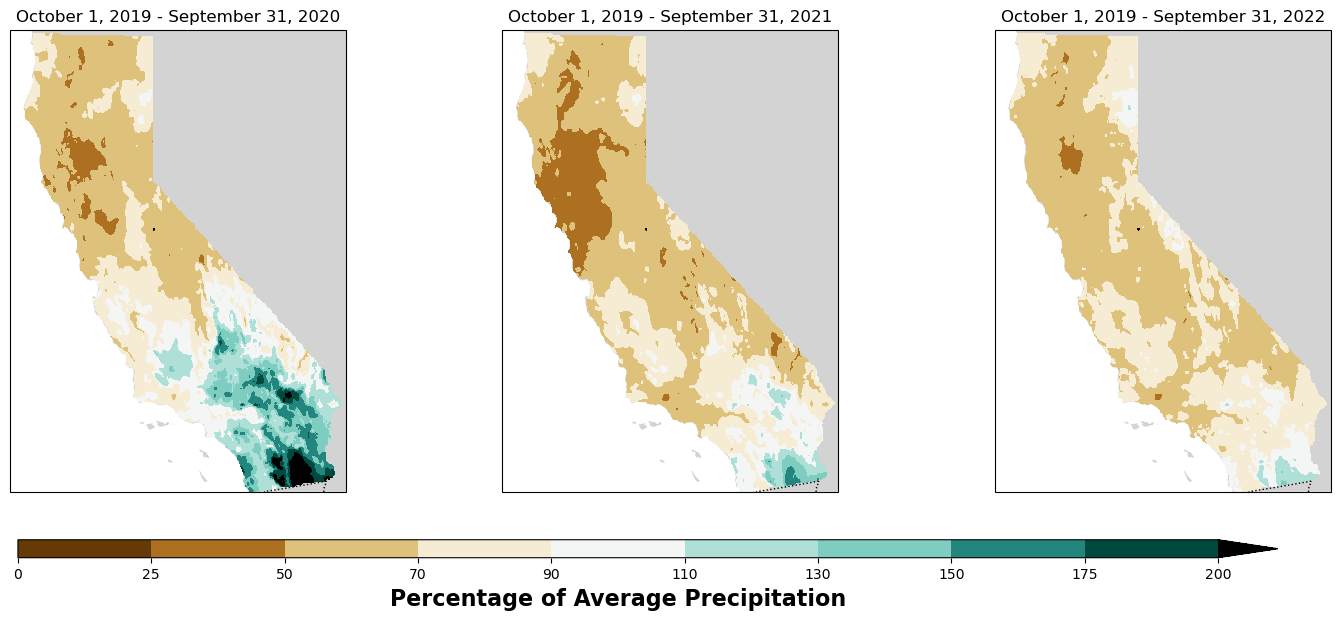

In [11]:
# Variables to plot
variables_to_plot = [
    ds.cum_loss_20.values,
    ds.cum_loss_20_21.values,
    ds.cum_loss_20_21_22.values
]

# Create subplots
fig, axes = plt.subplots(1, 3, subplot_kw={'projection': ccrs.epsg(3310)}, figsize=(18, 6))

# Titles for subplots
titles = ['October 1, 2019 - September 31, 2020', 'October 1, 2019 - September 31, 2021', 'October 1, 2019 - September 31, 2022']

# Create a colormap with distinct colors for each interval
cmap_discrete = ListedColormap(plt.get_cmap('BrBG')(np.linspace(0, 1, 31))[1::2])

# Iterate through variables and titles
for ax, variable, title in zip(axes, variables_to_plot, titles):
    # ax.set_extent([hrs.bounds['minx'].min(), hrs.bounds['maxx'].max(), hrs.bounds['miny'].min(), hrs.bounds['maxy'].max()])
    img = ax.contourf(lon, lat, variable, cmap=cmap_discrete, levels=[0,25,50,70,90,110,130,150,175,200], vmax=200, extend='max')
    img.cmap.set_over('black')
    hrs.plot(ax=ax, facecolor='none', edgecolor='black')
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    ax.set_title(title)


cbar_ax = fig.add_axes([0.15, 0.0, 0.7, 0.03])  # Adjust the position and size as needed
cbar = plt.colorbar(img, ax=ax, orientation='horizontal', shrink=0.8, ticks=[0,25,50,70,90,110,130,150,175,200], cax=cbar_ax)
cbar.set_label('Percentage of Average Precipitation', fontsize=16, weight='bold')

# fig.suptitle('Percentage of Average Precipitation', y=1.02)
plt.show()
# plt.tight_layout()